In [21]:
#===============================================================================
# Importing Necessary Libraries for Data Processing and Model Building
#===============================================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from statsmodels.tools.tools import add_constant
import math  # Import the math module for mathematical operations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster  # Import fcluster function

# Set seed for reproducibility
student_id = '4741644011'
first_three = int(student_id[:3])
last_three = int(student_id[-3:])
Randomizer = first_three + last_three
np.random.seed(Randomizer)
print(f"Randomizer seed: {Randomizer}")


Randomizer seed: 485


In [3]:

# =============================================================================
# Step 1: Load the Dataset and Inspect Its Structure
# =============================================================================
data = pd.read_csv('/content/sample_data/wine-clustering.csv')

print("First few rows of the dataset:")
#print(data.head())
print(data)

print("\nData Structure Information:")
print(data.info())
# Summary statistics
print(data.describe())
# Separating the text explanation with additional new lines for clarity
print("\n" + "="*80 + "\n")  # Adds a separator line
text = """The dataset consists of 178 entries across 13 columns, with all columns fully
populated. As indicated by the structural inspection (data.info()), there are
no null or NA values present in the data. Consequently, the dataset does not
require any imputation and is ready for further preprocessing or analysis.
This ensures the integrity of the data and simplifies the preparation process for
techniques like PCA or clustering."""
print(text)


First few rows of the dataset:
     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \

In [4]:
################################################################################
# Classifying variables
################################################################################

import pandas as pd

# Load your dataset
data = pd.read_csv('/content/sample_data/wine-clustering.csv')

# Classification function
def classify_variable(data):
    classifications = {}
    for col in data.columns:
        if col in ["Magnesium", "Proline"]:  # Integer-based counts
            type_ = "Ratio"
            nature = "Discrete"
        elif pd.api.types.is_numeric_dtype(data[col]):  # Continuous numeric values
            type_ = "Ratio"
            nature = "Continuous"
        else:  # Handle non-numeric variables (not present in this dataset)
            type_ = "Nominal"
            nature = "Discrete"
        classifications[col] = f"{type_}, {nature}"
    return classifications

# Apply the classification function
classifications = classify_variable(data)

# Print the classifications
print("Variable Classifications:")
for var, classification in classifications.items():
    print(f"{var}: {classification}")


Variable Classifications:
Alcohol: Ratio, Continuous
Malic_Acid: Ratio, Continuous
Ash: Ratio, Continuous
Ash_Alcanity: Ratio, Continuous
Magnesium: Ratio, Discrete
Total_Phenols: Ratio, Continuous
Flavanoids: Ratio, Continuous
Nonflavanoid_Phenols: Ratio, Continuous
Proanthocyanins: Ratio, Continuous
Color_Intensity: Ratio, Continuous
Hue: Ratio, Continuous
OD280: Ratio, Continuous
Proline: Ratio, Discrete


In [5]:
##############################################################################
# Step 2: Compute and Display Descriptive Statistics for Numeric Variables
###############################################################################

# List of numeric columns
numeric_columns = [
    'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
    'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
    'Color_Intensity', 'Hue', 'OD280', 'Proline'
]

# Function to calculate comprehensive descriptive statistics
def calculate_descriptive_stats(df, columns):
    stats_df = pd.DataFrame()
    stats_df['Mean'] = df[columns].mean()
    stats_df['Median'] = df[columns].median()
    stats_df['Mode'] = df[columns].mode().iloc[0]
    stats_df['St. Deviation'] = df[columns].std()
    stats_df['Range'] = df[columns].max() - df[columns].min()
    stats_df['IQR'] = df[columns].quantile(0.75) - df[columns].quantile(0.25)
    stats_df['Skewness'] = df[columns].skew()
    stats_df['Kurtosis'] = df[columns].kurtosis()
    return stats_df

# Apply the function to calculate stats for numeric variables
descriptive_stats = calculate_descriptive_stats(data, numeric_columns)

# Display the descriptive statistics
print("Descriptive Statistics for Numeric Variables:")
print(descriptive_stats)
# Separating the text explanation with additional new lines for clarity
print("\n" + "="*80 + "\n")  # Adds a separator line
text="""The descriptive statistics provide an insightful overview of the dataset's
variables, highlighting key aspects of their distributions and variability. For
instance, Alcohol has a mean of 13.00 and a median of 13.05, reflecting a nearly
symmetrical distribution, while its range of 3.80 indicates moderate variability.
Malic_Acid, with a mean of 2.34 and a median of 1.87, exhibits a right-skewed
distribution (Skewness: 1.04) and a range of 5.06, suggesting notable diversity
in its values. Ash appears balanced with a mean of 2.37, a median of 2.36, and a
narrow range of 1.87, while Magnesium, having a mean of 99.74, shows significant
variability with a range of 92.00 and a right-skewed distribution (Skewness: 1.10).
Proline demonstrates the highest variability among all variables, with a mean of
746.89, a range of 1402.00, and moderate right-skewness (Skewness: 0.77). In
contrast, OD280, with a mean of 2.61 and a median of 2.78, has a flatter
distribution (Kurtosis: -1.09) and lower variability (Range: 2.73). Similarly,
Hue is relatively stable, with a mean of 0.96, a median of 0.97, and a narrow
range of 1.23. These observations underscore the need for scaling, particularly
for highly variable features like Proline and Color_Intensity, to ensure balanced
contributions during analysis techniques such as PCA or clustering."""
print(text)

Descriptive Statistics for Numeric Variables:
                            Mean   Median    Mode  St. Deviation    Range  \
Alcohol                13.000618   13.050   12.37       0.811827     3.80   
Malic_Acid              2.336348    1.865    1.73       1.117146     5.06   
Ash                     2.366517    2.360    2.28       0.274344     1.87   
Ash_Alcanity           19.494944   19.500   20.00       3.339564    19.40   
Magnesium              99.741573   98.000   88.00      14.282484    92.00   
Total_Phenols           2.295112    2.355    2.20       0.625851     2.90   
Flavanoids              2.029270    2.135    2.65       0.998859     4.74   
Nonflavanoid_Phenols    0.361854    0.340    0.26       0.124453     0.53   
Proanthocyanins         1.590899    1.555    1.35       0.572359     3.17   
Color_Intensity         5.058090    4.690    2.60       2.318286    11.72   
Hue                     0.957449    0.965    1.04       0.228572     1.23   
OD280                   2.6116

In [6]:
###############################################################################
# Variance Inflation Factor (VIF)
###############################################################################


# Select numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Add a constant to the data for VIF calculation
data_with_constant = add_constant(data[numeric_columns])

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = data_with_constant.columns
vif_data["VIF"] = [
    variance_inflation_factor(data_with_constant.values, i)
    for i in range(data_with_constant.shape[1])
]

# Print the VIF results
print("Variance Inflation Factor (VIF):")
print(vif_data)
# Separating the text explanation with additional new lines for clarity
print("\n" + "="*80 + "\n")  # Adds a separator line
text="""The Variance Inflation Factor (VIF) analysis reveals moderate to high
multicollinearity among some variables in the dataset. Notably, Flavanoids has
the highest VIF at 7.03, indicating a strong correlation with other predictors,
which could affect the stability of a regression model. Similarly, Total_Phenols
shows moderate multicollinearity with a VIF of 4.33, while other variables like
OD280 (3.79) and Color_Intensity (3.03) exhibit some correlation but remain
within acceptable limits. Variables such as Magnesium (1.42) and Malic_Acid
(1.66) display low VIF values, reflecting minimal correlation and providing
stability in further analysis. The high VIF for the constant term (680.49) is
expected and does not impact the interpretation of variable multicollinearity.
These results suggest that multicollinearity is a concern primarily for
Flavanoids and, to a lesser extent, Total_Phenols, which may require removal,
transformation, or regularization techniques to ensure reliable modeling outcomes."""
print(text)

Variance Inflation Factor (VIF):
                Variable         VIF
0                  const  680.485185
1                Alcohol    2.460372
2             Malic_Acid    1.656647
3                    Ash    2.185448
4           Ash_Alcanity    2.238732
5              Magnesium    1.417855
6          Total_Phenols    4.334519
7             Flavanoids    7.029350
8   Nonflavanoid_Phenols    1.796380
9        Proanthocyanins    1.975683
10       Color_Intensity    3.026304
11                   Hue    2.551447
12                 OD280    3.785473
13               Proline    2.823849


The Variance Inflation Factor (VIF) analysis reveals moderate to high
multicollinearity among some variables in the dataset. Notably, Flavanoids has
the highest VIF at 7.03, indicating a strong correlation with other predictors,
which could affect the stability of a regression model. Similarly, Total_Phenols
shows moderate multicollinearity with a VIF of 4.33, while other variables like
OD280 (3.79) and Col

Correlation Matrix (Tabular):
                       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398  

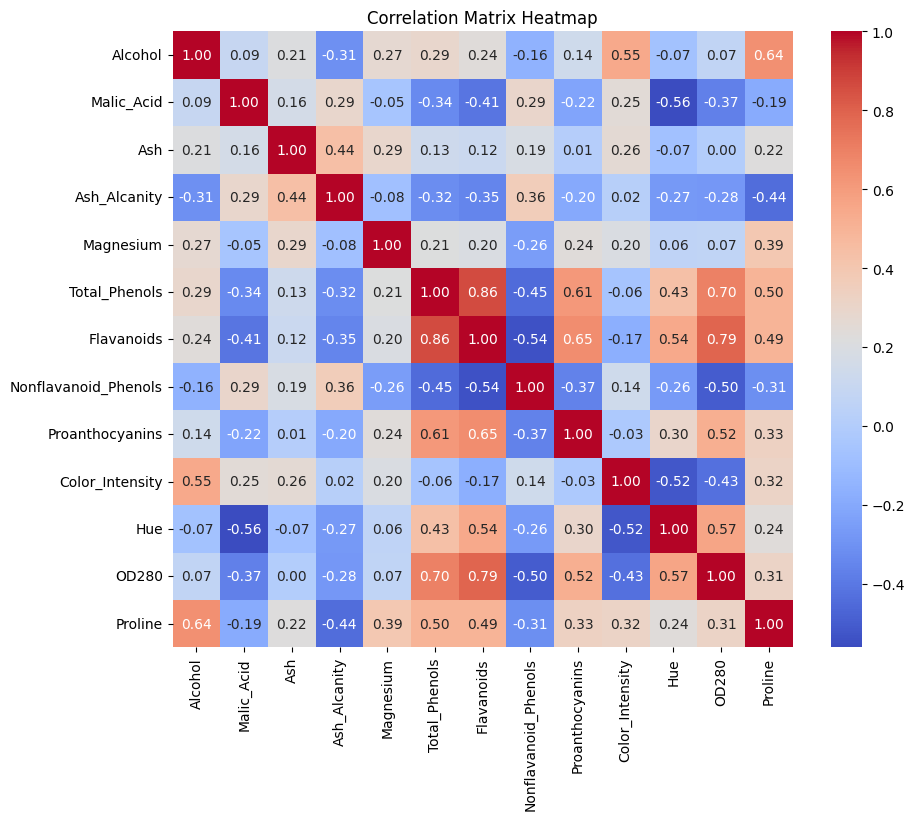



The correlation matrix reveals important relationships between the variables in
the dataset. Alcohol shows a strong positive correlation with Proline (0.64) and
Color_Intensity (0.55), indicating that wines with higher alcohol content also
end to have more intense color and higher Proline levels. Malic_Acid, on the other
hand, demonstrates a moderate negative correlation with Hue (-0.56) and OD280
(-0.37), suggesting that higher levels of Malic_Acid are associated with less
vibrant hues and lower optical density. Total_Phenols and Flavanoids exhibit a
very strong positive correlation (0.86), reflecting their close relationship,
likely due to their shared chemical properties. Nonflavanoid_Phenols, however,
has a strong negative correlation with Flavanoids (-0.54), showing that these
phenolic compounds vary inversely. Interestingly, Ash and Ash_Alcanity correlate
positively (0.44), suggesting a relationship between these chemical
characteristics of the wine. Overall, these correlations

In [7]:
#########################
# Correlation Matrix: Tabular and Heatmap
#########################



# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Tabular display of the correlation matrix
print("Correlation Matrix (Tabular):")
print(correlation_matrix)

# Heatmap visualization of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size for clarity
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()
# Separating the text explanation with additional new lines for clarity
print("\n" + "="*80 + "\n")  # Adds a separator line
text="""The correlation matrix reveals important relationships between the variables in
the dataset. Alcohol shows a strong positive correlation with Proline (0.64) and
Color_Intensity (0.55), indicating that wines with higher alcohol content also
end to have more intense color and higher Proline levels. Malic_Acid, on the other
hand, demonstrates a moderate negative correlation with Hue (-0.56) and OD280
(-0.37), suggesting that higher levels of Malic_Acid are associated with less
vibrant hues and lower optical density. Total_Phenols and Flavanoids exhibit a
very strong positive correlation (0.86), reflecting their close relationship,
likely due to their shared chemical properties. Nonflavanoid_Phenols, however,
has a strong negative correlation with Flavanoids (-0.54), showing that these
phenolic compounds vary inversely. Interestingly, Ash and Ash_Alcanity correlate
positively (0.44), suggesting a relationship between these chemical
characteristics of the wine. Overall, these correlations highlight key
interactions among the variables, which can be useful in feature selection,
reducing multicollinearity, or understanding wine composition more thoroughly."""
print(text)

In [8]:
#########################
# Select 6 Most Relevant Variables Based on Correlation
#########################

# Compute the correlation matrix
corr_matrix = data.corr()

# Select correlations with the target variable (e.g., Alcohol)
target_variable = 'Alcohol'  # Replace this with your desired target variable
correlations = corr_matrix[target_variable].drop(target_variable)  # Exclude self-correlation

# Sort variables by absolute correlation values in descending order
most_relevant_vars = correlations.abs().sort_values(ascending=False).head(6).index

# Print the most relevant variables
print("6 Most Relevant Variables with", target_variable, ":\n", most_relevant_vars)


6 Most Relevant Variables with Alcohol :
 Index(['Proline', 'Color_Intensity', 'Ash_Alcanity', 'Total_Phenols',
       'Magnesium', 'Flavanoids'],
      dtype='object')


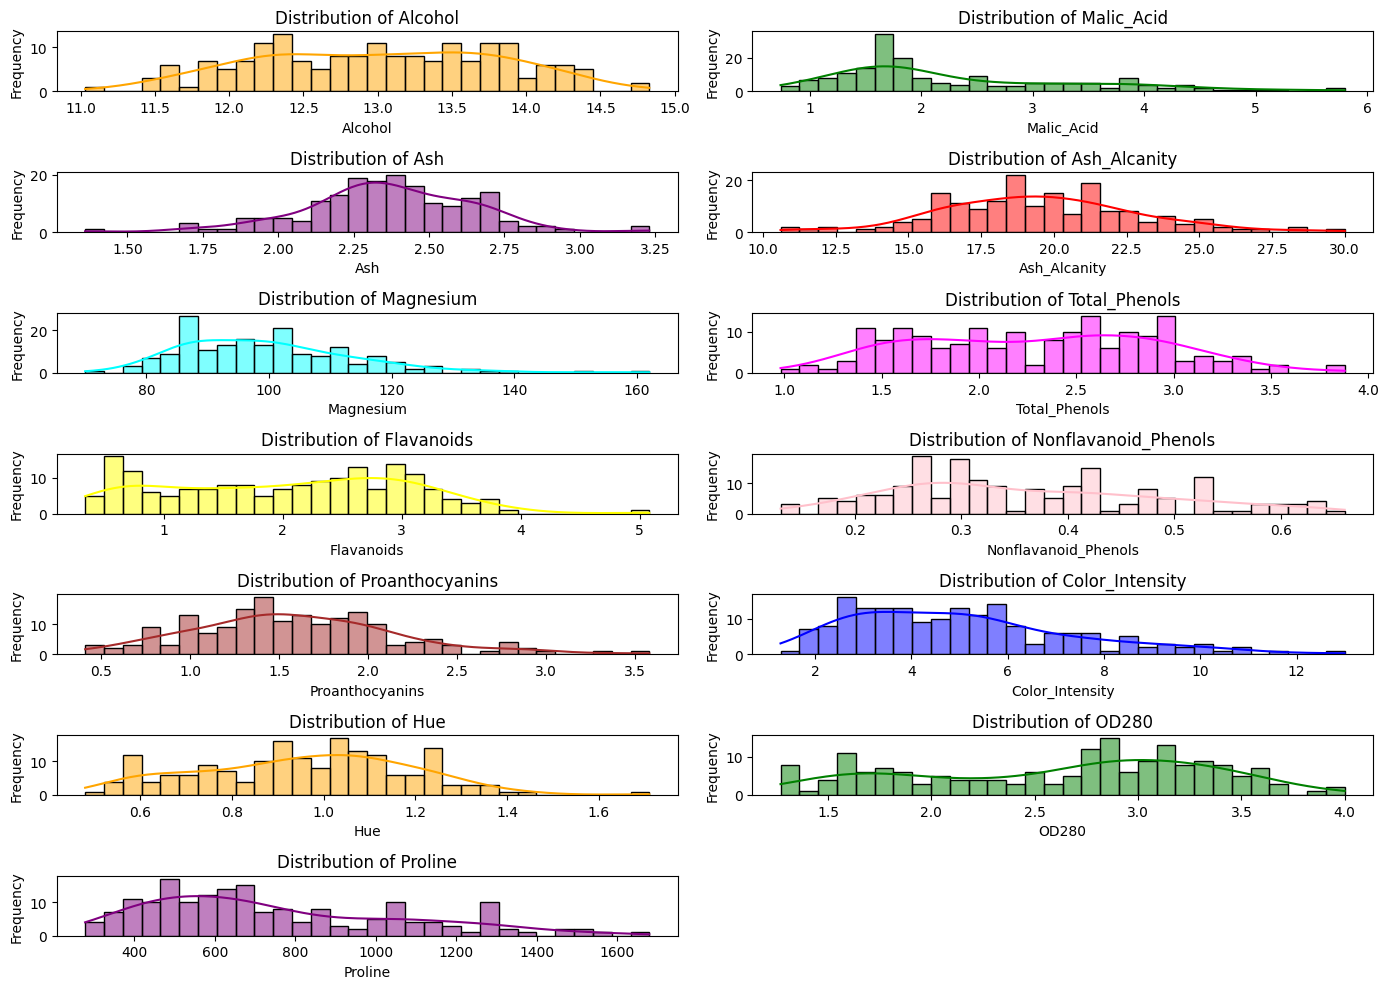



When we look at the univariate distribution plots for all numeric
variables, we see distinct patterns for each. For instance, Alcohol has a
near-normal distribution with a mean of about 13.0, a median of 13.05, and a
range of roughly 3.8, which indicates most values cluster around the center.
Malic_Acid, on the other hand, appears right-skewed—with a mean of approximately
2.34 and a median of 1.87—implying many wines have lower malic acid levels while
a few high values extend its range to about 5.06. Similarly, Ash is tightly
clustered around 2.36 with a narrow spread, whereas Ash_Alcanity has central
values near 19.5 with a wide range of around 19.4. Magnesium averages 99.74 with
a range of 92, and variables like Total_Phenols and Flavanoids, with means around
2.30 and 2.03 respectively, show moderate variability. Overall, we observe that
the data displays consistent central tendencies along with some variability and
skewness in certain features, which sets a solid foundation for fu

In [9]:
#########################
# Univariate Analysis: Distribution Plots
#########################
# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Define a list of unique colors for the plots
colors = ['blue', 'orange', 'green', 'purple', 'red', 'cyan', 'magenta', 'yellow', 'pink', 'brown']
# Determine the number of rows and columns for the grid
num_vars = len(numeric_columns)
cols = 2  # Fixed number of columns
rows = math.ceil(num_vars / cols)  # Dynamically calculate rows
# Plot histograms in a grid layout
plt.figure(figsize=(14, 10))  # Adjust figure size for clarity
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)  # Create a grid with 4 rows and 2 columns
    sns.histplot(data[column], bins=30, kde=True, color=colors[i % len(colors)], edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()  # Adjust spacing between subplots
plt.show()
# Separating the text explanation with additional new lines for clarity
print("\n" + "="*80 + "\n")  # Adds a separator line
text="""When we look at the univariate distribution plots for all numeric
variables, we see distinct patterns for each. For instance, Alcohol has a
near-normal distribution with a mean of about 13.0, a median of 13.05, and a
range of roughly 3.8, which indicates most values cluster around the center.
Malic_Acid, on the other hand, appears right-skewed—with a mean of approximately
2.34 and a median of 1.87—implying many wines have lower malic acid levels while
a few high values extend its range to about 5.06. Similarly, Ash is tightly
clustered around 2.36 with a narrow spread, whereas Ash_Alcanity has central
values near 19.5 with a wide range of around 19.4. Magnesium averages 99.74 with
a range of 92, and variables like Total_Phenols and Flavanoids, with means around
2.30 and 2.03 respectively, show moderate variability. Overall, we observe that
the data displays consistent central tendencies along with some variability and
skewness in certain features, which sets a solid foundation for further
multivariate analysis. """
print(text)

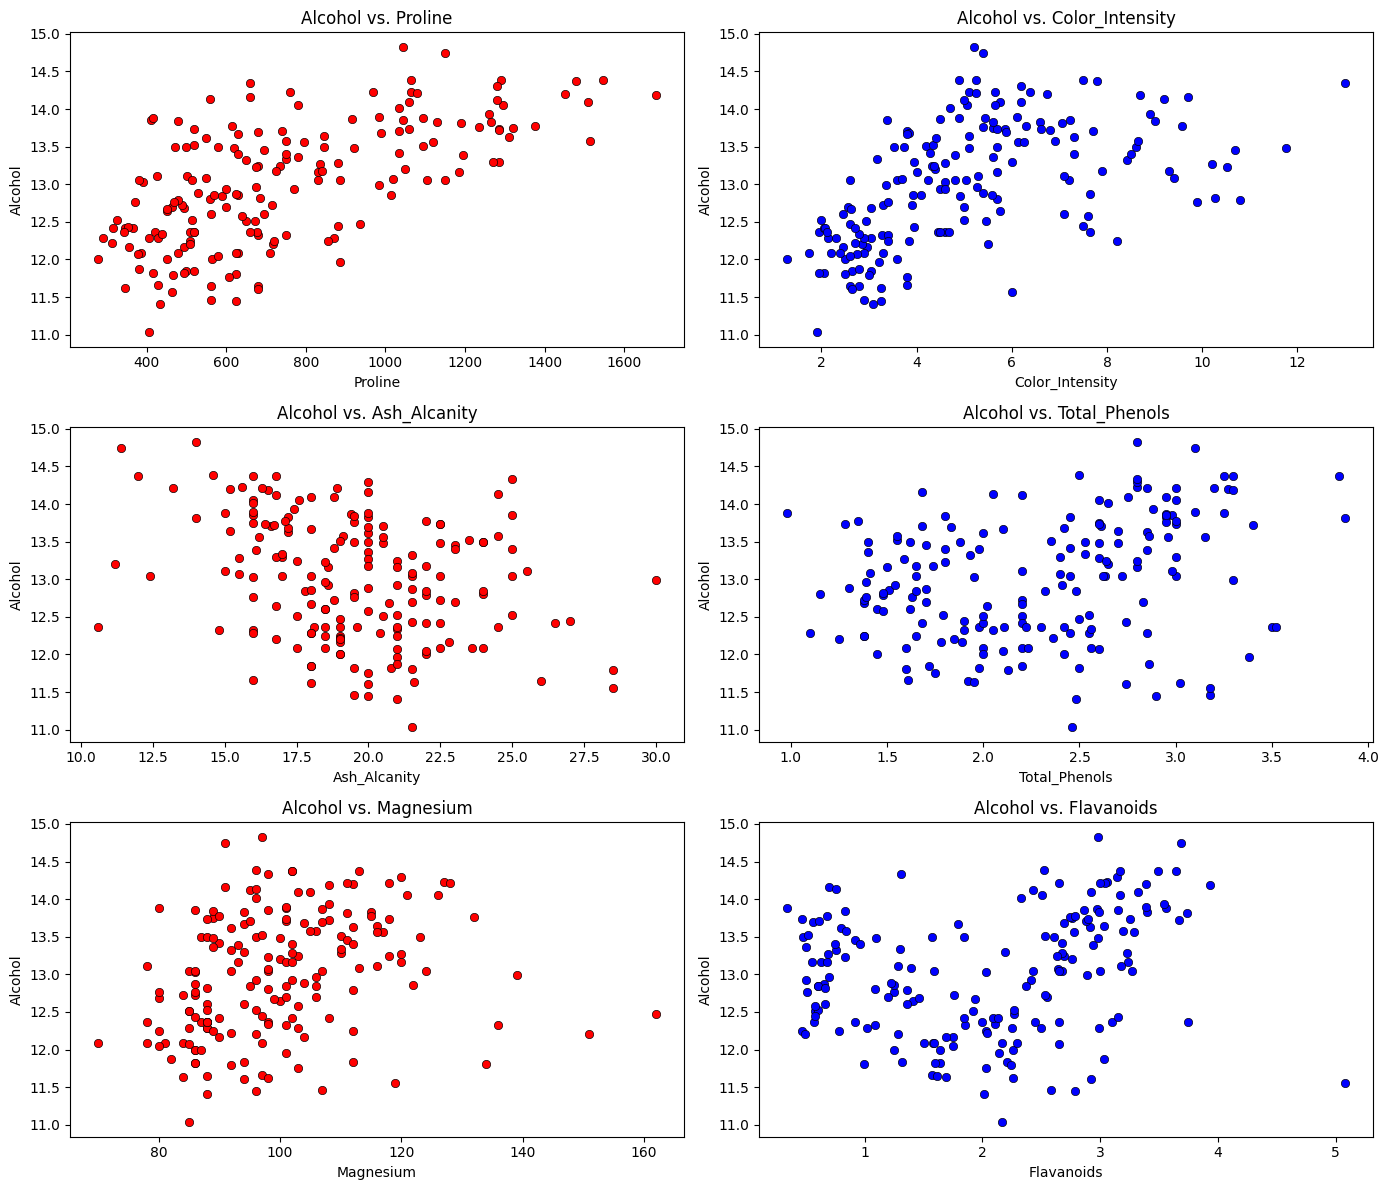



In our bivariate analysis, we examined the relationship between Alcohol
and each of the six most relevant variables. For instance, the scatter plot for
Alcohol versus Proline reveals a strong positive association—with a correlation
around 0.64—indicating that higher Proline levels tend to coincide with elevated
Alcohol content. The Alcohol versus Color_Intensity plot, on the other hand,
shows a moderate positive trend, which suggests that wines with more intense
coloration generally have higher Alcohol percentages. Conversely, the Alcohol
versus Ash_Alcanity scatter plot displays a modest negative relation, implying
that increased ash alkalinity may correspond to slightly lower Alcohol levels.
Similarly, the relationships between Alcohol and both Total_Phenols and Flavanoids
are positive, though their trends are more moderate, while the connection between
Alcohol and Magnesium appears relatively weak. In summary, these bivariate
relationships highlight that key wine characteristics s

In [10]:
#########################
# Bivariate Analysis: Scatter Plots for Top 6 Relevant Variables
#########################
# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix and select top 6 most relevant variables
target_variable = 'Alcohol'  # Change this to the target variable of your choice
corr_matrix = data.corr()
correlations = corr_matrix[target_variable].drop(target_variable)  # Exclude self-correlation
most_relevant_vars = correlations.abs().sort_values(ascending=False).head(6).index

# Define the colors
colors = ['blue', 'red']

# Plot scatter plots for the target variable vs. top 6 relevant variables
plt.figure(figsize=(14, 12))  # Adjust figure size
for i, column in enumerate(most_relevant_vars, 1):
    plt.subplot(3, 2, i)  # Create a 3x2 grid layout
    sns.scatterplot(x=column, y=target_variable, data=data, color=colors[i % 2], edgecolor='black')
    plt.title(f"{target_variable} vs. {column}")
    plt.xlabel(column)
    plt.ylabel(target_variable)
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# Pairplot for all numeric variables
#sns.pairplot(data[numeric_columns])
#plt.suptitle("Bivariate Analysis: Pairplot of Numeric Variables", y=1.02)
#plt.show()
# Separating the text explanation with additional new lines for clarity
print("\n" + "="*80 + "\n")  # Adds a separator line
text="""In our bivariate analysis, we examined the relationship between Alcohol
and each of the six most relevant variables. For instance, the scatter plot for
Alcohol versus Proline reveals a strong positive association—with a correlation
around 0.64—indicating that higher Proline levels tend to coincide with elevated
Alcohol content. The Alcohol versus Color_Intensity plot, on the other hand,
shows a moderate positive trend, which suggests that wines with more intense
coloration generally have higher Alcohol percentages. Conversely, the Alcohol
versus Ash_Alcanity scatter plot displays a modest negative relation, implying
that increased ash alkalinity may correspond to slightly lower Alcohol levels.
Similarly, the relationships between Alcohol and both Total_Phenols and Flavanoids
are positive, though their trends are more moderate, while the connection between
Alcohol and Magnesium appears relatively weak. In summary, these bivariate
relationships highlight that key wine characteristics such as Proline and Color
Intensity are associated with variations in Alcohol content. """
print(text)

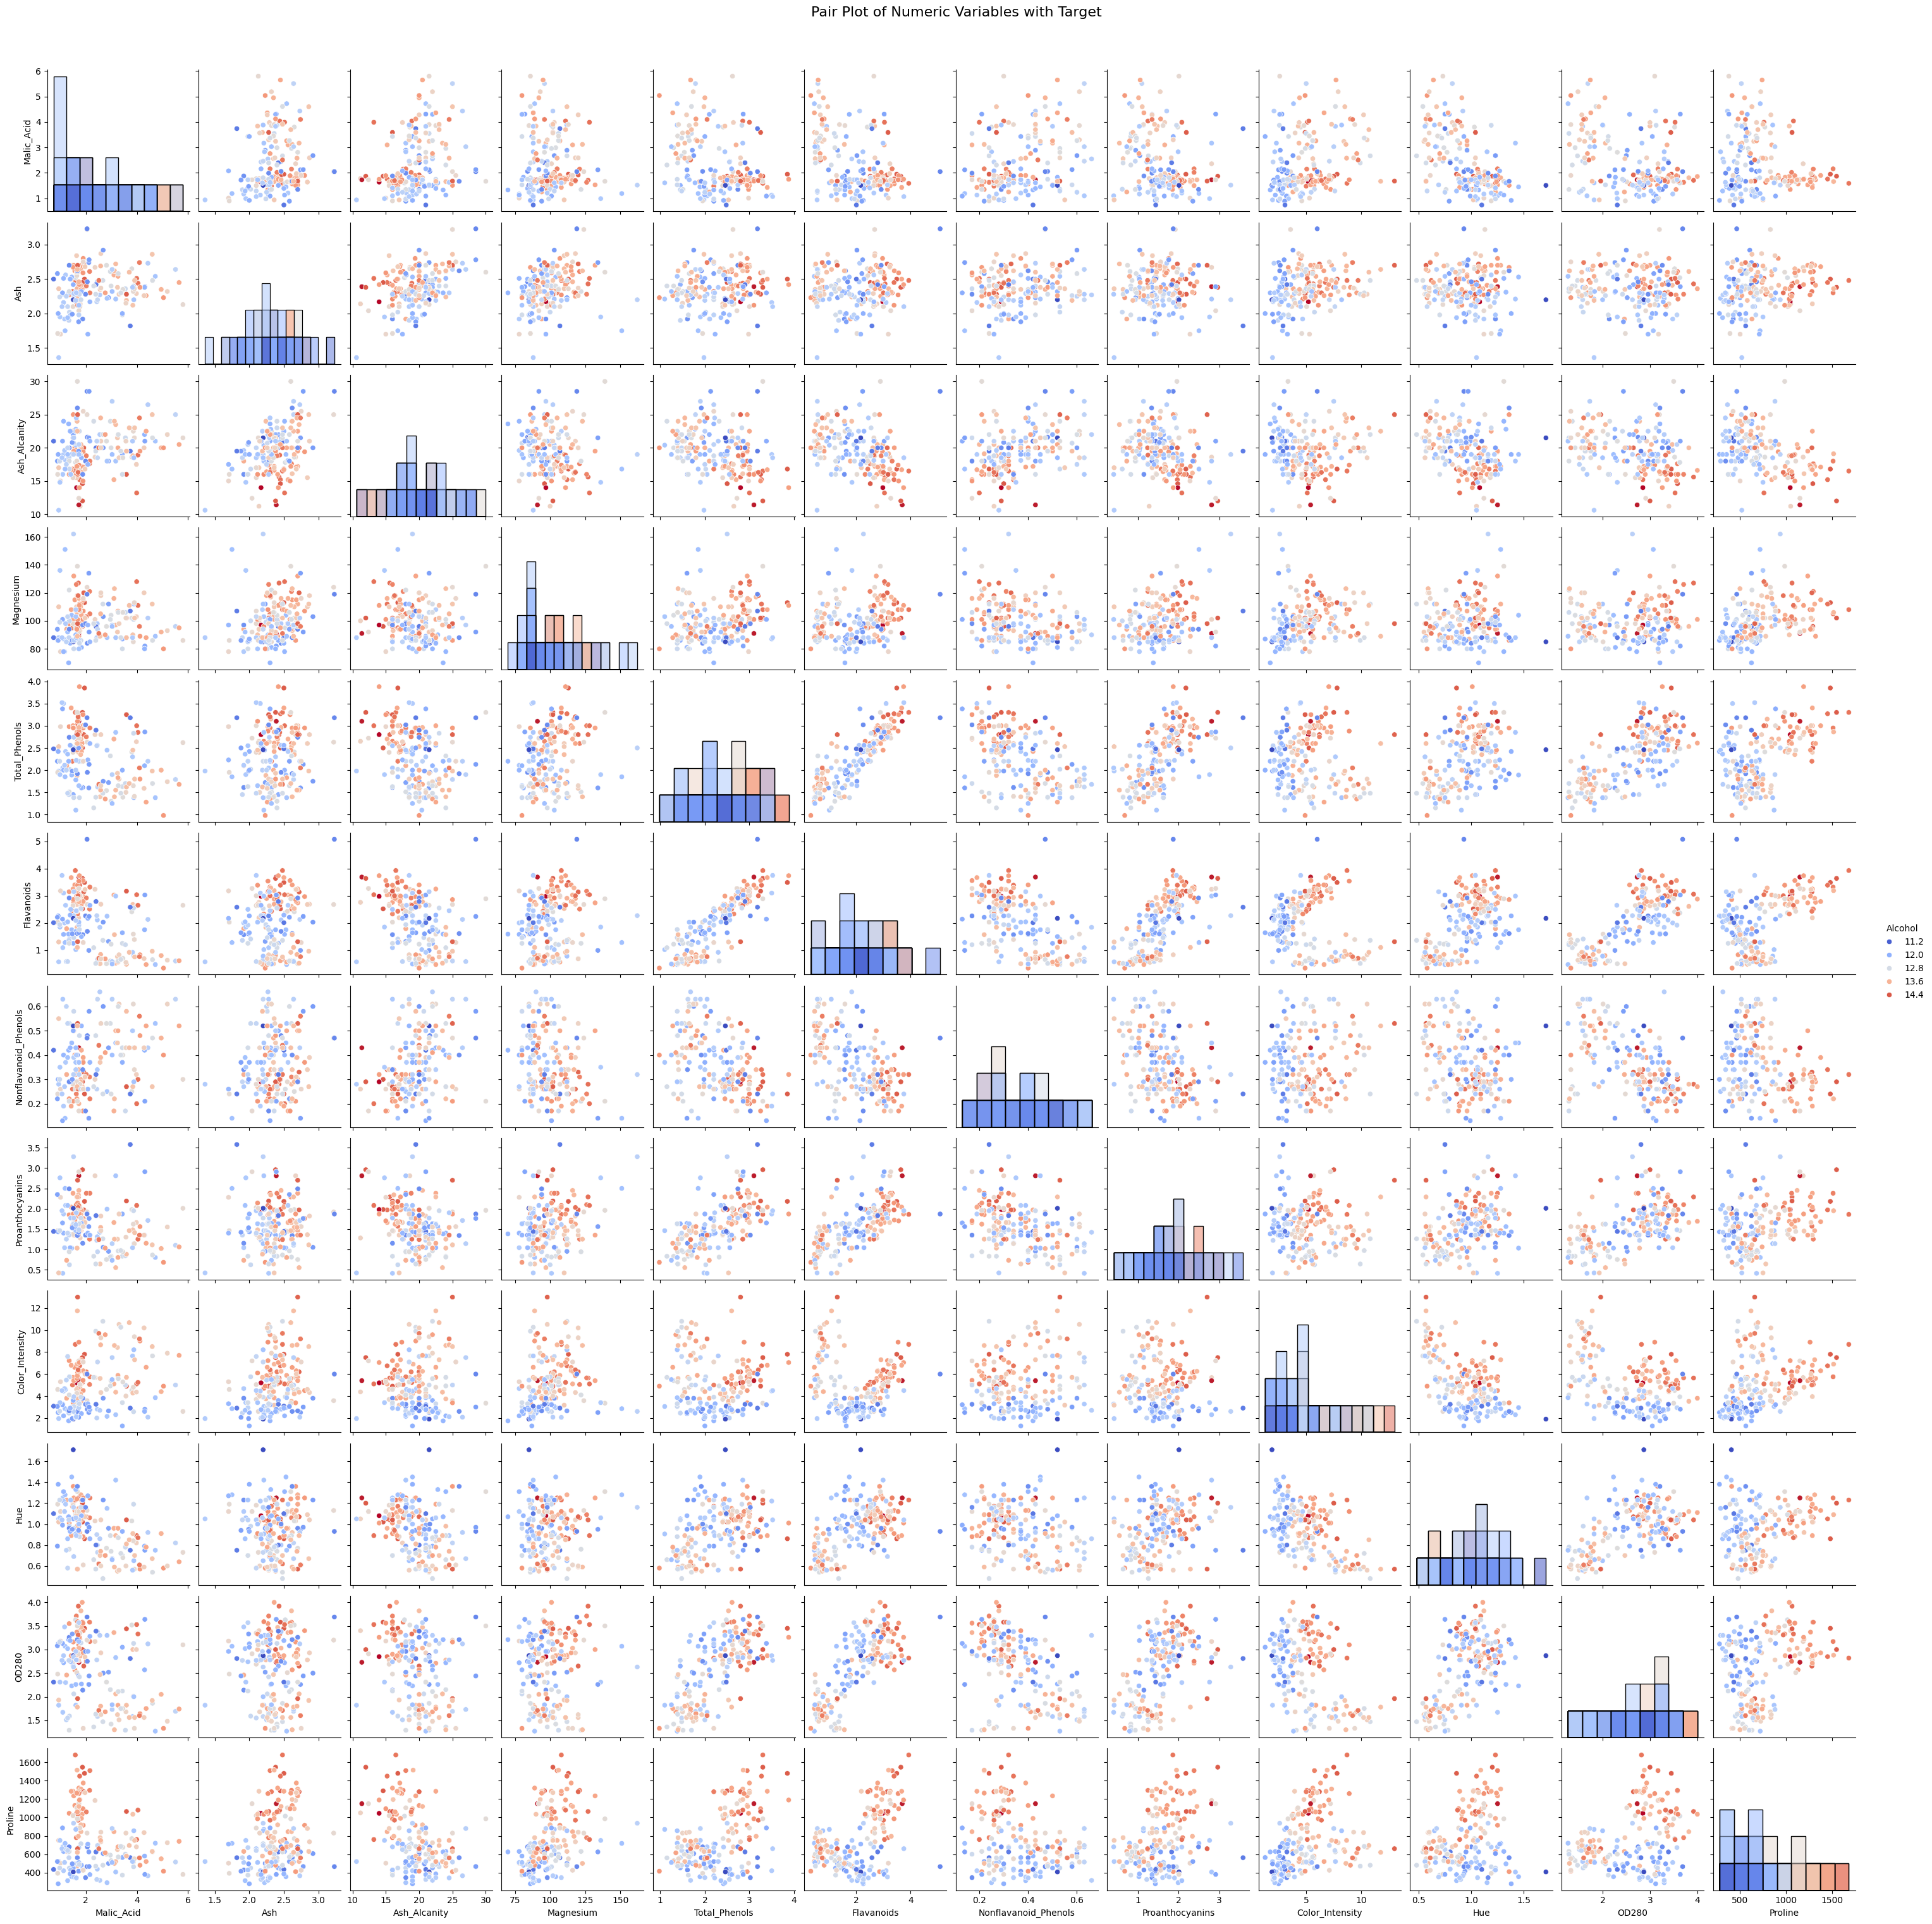

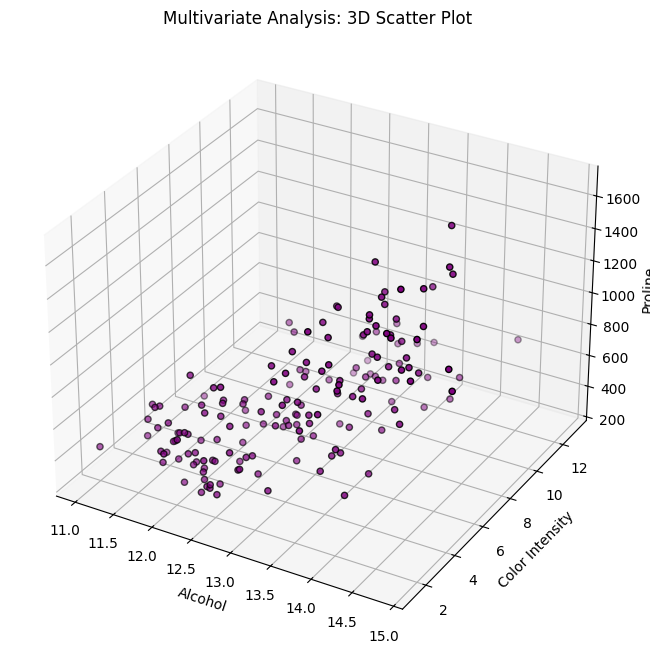



In our multivariate analysis, we constructed a pair plot with the target
variable (Alcohol) as the grouping hue to reveal the intricate interrelationships
among the numeric features. We observe that the scatter plot for Alcohol versus
Proline shows a distinct positive trend—with higher Proline values generally
associated with higher Alcohol percentages, consistent with our earlier
correlation of about 0.64. Similarly, Alcohol versus Color_Intensity displays a
moderate upward trend, suggesting that wines with more intense coloration often
have higher Alcohol content. In contrast, the plot for Alcohol versus
Ash_Alcanity indicates a slight negative relationship, where wines with higher
ash alkalinity tend to have marginally lower Alcohol levels. The diagonal
histograms confirm that variables like Alcohol and Malic_Acid are approximately
normally distributed, while others, such as Malic_Acid itself, show some skewness.
Moreover, by color-coding observations according to Alcohol levels, 

In [11]:

#########################
# Multivariate Analysis: Pair Plot with a Title
#########################

# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Add only unique columns to the plot_columns list (avoid duplication of target variable)
target_variable = 'Alcohol'  # Replace with your actual target column
plot_columns = [col for col in numeric_columns if col != target_variable] + [target_variable]

# Create the pair plot
g = sns.pairplot(data[plot_columns], hue=target_variable, palette='coolwarm', diag_kind='hist')

# Add a main title for the figure
g.fig.suptitle("Pair Plot of Numeric Variables with Target", fontsize=16, y=1.02)

# Show the plot
plt.show()


#########################
# Multivariate Analysis: 3D Scatter Plot
#########################
# Example 3D Scatter Plot: Alcohol, Color_Intensity, Proline
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Alcohol'], data['Color_Intensity'], data['Proline'], c='purple', edgecolor='k')
ax.set_title("Multivariate Analysis: 3D Scatter Plot")
ax.set_xlabel("Alcohol")
ax.set_ylabel("Color Intensity")
ax.set_zlabel("Proline")
plt.show()
# Separating the text explanation with additional new lines for clarity
print("\n" + "="*80 + "\n")  # Adds a separator line
text="""In our multivariate analysis, we constructed a pair plot with the target
variable (Alcohol) as the grouping hue to reveal the intricate interrelationships
among the numeric features. We observe that the scatter plot for Alcohol versus
Proline shows a distinct positive trend—with higher Proline values generally
associated with higher Alcohol percentages, consistent with our earlier
correlation of about 0.64. Similarly, Alcohol versus Color_Intensity displays a
moderate upward trend, suggesting that wines with more intense coloration often
have higher Alcohol content. In contrast, the plot for Alcohol versus
Ash_Alcanity indicates a slight negative relationship, where wines with higher
ash alkalinity tend to have marginally lower Alcohol levels. The diagonal
histograms confirm that variables like Alcohol and Malic_Acid are approximately
normally distributed, while others, such as Malic_Acid itself, show some skewness.
Moreover, by color-coding observations according to Alcohol levels, we notice
clusters and gradients—particularly in relationships like Total_Phenols versus
Flavanoids—which underscore their chemical relatedness and their influence on
the overall wine profile. This integrated visualization helps us pinpoint key
predictors and highlights that while most pairwise relationships follow expected
trends (for example, the strong association between Proline and Alcohol), some
variables, such as Magnesium, show weaker interactions with the target. Overall,
this multivariate view provides a comprehensive snapshot of both individual
distributions and pairwise interactions, allowing us to better understand the
structure and dynamics of the data."""
print(text)

In [12]:
#############################
# Step 4: Log Transformation on Skewed Variables
# This step applies logarithmic transformations to variables with high right-skewness.
# We target variables with substantial positive skew to normalize their distributions
# and reduce the impact of extreme values.
#############################


# Apply logarithmic transformations to the selected skewed variables.
# These variables have been identified for transformation based on their skewness:
# - Malic_Acid (skewness ~ 1.04)
# - Magnesium (skewness ~ 1.10)
# - Color_Intensity (skewness ~ 0.87)
# - Proline (skewness ~ 0.77)
# Note: Ensure there are no zeros; if present, add a small constant before applying np.log.

data['log_Malic_Acid'] = np.log(data['Malic_Acid'])
data['log_Magnesium'] = np.log(data['Magnesium'])
data['log_Color_Intensity'] = np.log(data['Color_Intensity'])
data['log_Proline'] = np.log(data['Proline'])

# Define the function to calculate comprehensive descriptive statistics
def calculate_descriptive_stats(df, columns):
    stats_df = pd.DataFrame()
    stats_df['Mean'] = df[columns].mean()
    stats_df['Median'] = df[columns].median()
    stats_df['Mode'] = df[columns].mode().iloc[0]
    stats_df['St. Deviation'] = df[columns].std()
    stats_df['Range'] = df[columns].max() - df[columns].min()
    stats_df['IQR'] = df[columns].quantile(0.75) - df[columns].quantile(0.25)
    stats_df['Skewness'] = df[columns].skew()
    stats_df['Kurtosis'] = df[columns].kurtosis()
    return stats_df

# List of transformed variables
transformed_vars = ['log_Malic_Acid', 'log_Magnesium', 'log_Color_Intensity', 'log_Proline']

# Apply the function to calculate stats for transformed variables
transformed_stats = calculate_descriptive_stats(data, transformed_vars)
print("Descriptive Statistics for Transformed Variables:")
print(transformed_stats)


# A text paragraph to explain the rationale behind the transformation

# Separating the text explanation with additional new lines for clarity
print("\n" + "="*80 + "\n")  # Adds a separator line
text = """
We applied logarithmic transformations to the variables Malic_Acid, Magnesium,
Color_Intensity, and Proline because these variables exhibited moderate to high
right-skewness in their original forms.The log transformation compresses the
range of values and reduces the influence of extreme outliers, resulting in more
symmetric (normal-like) distributions. This adjustment not only facilitates better
interpretation of the data but may also enhance the performance of statistical
and machine learning models that assume normally distributed input features.
"""
print(text)

# Separating the text explanation with additional new lines for clarity
print("\n" + "="*80 + "\n")  # Adds a separator line
text = """
Log transformations noticeably improved the normality of the data. For example,
Malic_Acid’s skewness dropped from ~1.04 to 0.27 and its range from ~5.06 to 2.06.
Magnesium’s skew decreased from ~1.10 to 0.60, with its range shrinking from
92.00 to 0.84. Color_Intensity became almost symmetric (skew from ~0.87 to -0.08),
and Proline’s skew fell from ~0.77 to 0.09 with its range compressing from ~1402
to 1.80. Overall, these changes show that the log transformation effectively
reduces extreme values and stabilizes variance, making the data more suitable
for modeling.
"""
print(text)


Descriptive Statistics for Transformed Variables:
                         Mean    Median      Mode  St. Deviation     Range  \
log_Malic_Acid       0.745052  0.623257  0.548121       0.450274  2.058963   
log_Magnesium        4.593042  4.584967  4.477337       0.136627  0.839101   
log_Color_Intensity  1.518031  1.545430  0.955511       0.460189  2.318089   
log_Proline          6.530303  6.512486  6.253829       0.415107  1.798928   

                          IQR  Skewness  Kurtosis  
log_Malic_Acid       0.654131  0.274613 -0.653836  
log_Magnesium        0.195492  0.601445  0.608504  
log_Color_Intensity  0.655182 -0.080464 -0.579637  
log_Proline          0.677036  0.086823 -0.834138  



We applied logarithmic transformations to the variables Malic_Acid, Magnesium,
Color_Intensity, and Proline because these variables exhibited moderate to high
right-skewness in their original forms.The log transformation compresses the
range of values and reduces the influence of extreme outlier

In [13]:
#############################
# Step 5: Creating a Combined DataFrame with Non-Transformed and Transformed Variables
# This step creates a new DataFrame that retains the original variables (those not transformed)
# along with the transformed versions of the skewed variables.
#############################

# Identify the original variables that were NOT transformed.
# Here we remove the variables that we transformed from the list of all columns.
non_transformed_vars = [col for col in data.columns if col not in ['Malic_Acid', 'Magnesium', 'Color_Intensity', 'Proline']
                        and not col.startswith('log_')]

# Create a new DataFrame that includes non-transformed original variables plus the transformed variables.
combined_columns = non_transformed_vars + transformed_vars
new_df = data[combined_columns]

# Display the first few rows of the new DataFrame
print("New DataFrame with Non-Transformed and Transformed Variables:")
print(new_df.head())

New DataFrame with Non-Transformed and Transformed Variables:
   Alcohol   Ash  Ash_Alcanity  Total_Phenols  Flavanoids  \
0    14.23  2.43          15.6           2.80        3.06   
1    13.20  2.14          11.2           2.65        2.76   
2    13.16  2.67          18.6           2.80        3.24   
3    14.37  2.50          16.8           3.85        3.49   
4    13.24  2.87          21.0           2.80        2.69   

   Nonflavanoid_Phenols  Proanthocyanins   Hue  OD280  log_Malic_Acid  \
0                  0.28             2.29  1.04   3.92        0.536493   
1                  0.26             1.28  1.05   3.40        0.576613   
2                  0.30             2.81  1.03   3.17        0.858662   
3                  0.24             2.18  0.86   3.45        0.667829   
4                  0.39             1.82  1.04   2.93        0.951658   

   log_Magnesium  log_Color_Intensity  log_Proline  
0       4.844187             1.729884     6.970730  
1       4.605170          

In [14]:
#############################
# Step 7: Dimensionality Reduction and Clustering Analysis
# This section performs PCA to reduce the dimensionality of the data (capturing 80% of the variance),
# then uses K-Means clustering (evaluating k values from 3 to 7) and hierarchical clustering
# (via Ward's method) to identify clusters. It also discusses key clustering assumptions.
#############################

# Extract numeric data from the combined DataFrame (new_df created in Step 5)
# new_df contains original variables (not transformed) plus the log-transformed skewed variables.
numeric_data = new_df.select_dtypes(include=[np.number])

# Standardize the numeric data before PCA (important for both PCA and clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# ------------------------------
# PCA: Dimensionality Reduction and Model Interpretation
# ------------------------------
# Apply PCA to capture 80% of the variance
pca = PCA(n_components=0.80, random_state=Randomizer)
pca_data = pca.fit_transform(scaled_data)

print("PCA Results:")
print("Number of components selected:", pca.n_components_)
print("Total variance explained:", round(sum(pca.explained_variance_ratio_), 3))



# Extract and display the loadings (principal component coefficients)
loadings = pd.DataFrame(pca.components_.T,
                        index=numeric_data.columns,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\nPCA Loadings (Contribution of Original Variables to Each Component):")
print(loadings)

# For interpretation, print the top 3 most contributing variables (in absolute terms) for each component.
for i in range(pca.n_components_):
    comp = f'PC{i+1}'
    top_vars = loadings[comp].abs().sort_values(ascending=False).head(3)
    print(f"\nTop contributing variables for {comp}:")
    print(top_vars)
text = """
Your PCA output is a good approach. By setting the variance threshold to 80%,
you ended up with 5 components that together explain about 80.5% of the total
variance. This indicates that a reasonably small number of dimensions capture
most of the information in your data. For example, PC1 is driven primarily by
Flavanoids, Total_Phenols, and OD280, while PC2 is dominated by
log_Color_Intensity, Alcohol, and log_Proline. PC3 mainly reflects the
contributions of Ash and Ash_Alcanity, and PC4 and PC5 are influenced by
log_Malic_Acid, Hue, Proanthocyanins, and notably log_Magnesium and
Nonflavanoid_Phenols respectively.

This output illustrates that our PCA not only optimizes dimensionality—reducing
noise and computational complexity—but also offers interpretability through the
calculated loadings.
"""
print(text)


PCA Results:
Number of components selected: 5
Total variance explained: 0.805

PCA Loadings (Contribution of Original Variables to Each Component):
                           PC1       PC2       PC3       PC4       PC5
Alcohol               0.152305  0.460831 -0.194897  0.014669 -0.285450
Ash                  -0.001382  0.307311  0.618016 -0.241618 -0.117725
Ash_Alcanity         -0.244748 -0.016201  0.604799  0.030182  0.072694
Total_Phenols         0.402565  0.044089  0.156484  0.157597 -0.166653
Flavanoids            0.427846 -0.015539  0.160397  0.133184 -0.117490
Nonflavanoid_Phenols -0.304356  0.031694  0.160819 -0.238912 -0.527984
Proanthocyanins       0.320856  0.009650  0.165361  0.376814  0.078097
Hue                   0.294906 -0.269365  0.070633 -0.467953 -0.154929
OD280                 0.378497 -0.163793  0.175111  0.170335 -0.107063
log_Malic_Acid       -0.229524  0.259681  0.146103  0.539209  0.025430
log_Magnesium         0.148556  0.315165  0.118646 -0.318612  0.715878



K-Means Clustering Evaluation:
Silhouette Score for k = 3: 0.383
Silhouette Score for k = 4: 0.315
Silhouette Score for k = 5: 0.285
Silhouette Score for k = 6: 0.276
Silhouette Score for k = 7: 0.206


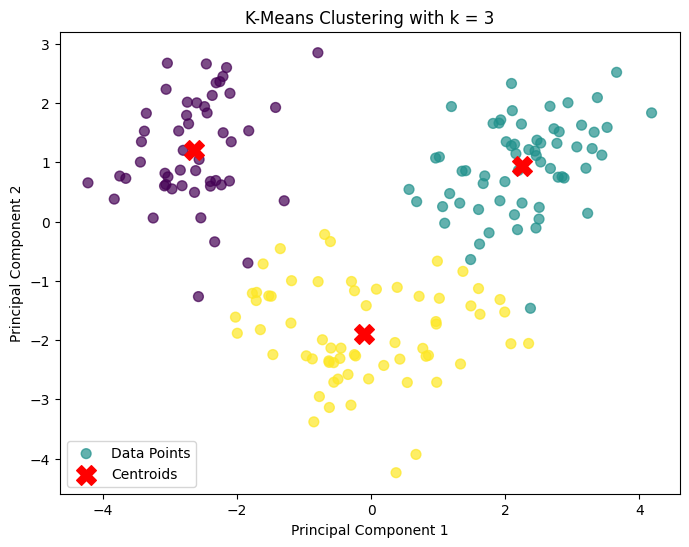

In [28]:
# ------------------------------
# K-Means Clustering Evaluation
# ------------------------------
print("\nK-Means Clustering Evaluation:")
# Evaluate k values from 3 to 7 using the silhouette score to decide the optimal number of clusters
for k in range(3, 8):
    kmeans = KMeans(n_clusters=k, random_state=Randomizer)
    clusters = kmeans.fit_predict(pca_data)
    score = silhouette_score(pca_data, clusters)
    print(f"Silhouette Score for k = {k}: {score:.3f}")

# For demonstration, choose k = 3 (or choose the best based on silhouette score)
k_best = 3
kmeans = KMeans(n_clusters=k_best, random_state=Randomizer)
clusters = kmeans.fit_predict(pca_data)

# Extract centroids from the k-means model
centroids = kmeans.cluster_centers_

# Visualize K-Means clustering using the first two principal components, and plot the centroids
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title(f"K-Means Clustering with k = {k_best}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

text="""
The K-Means clustering evaluation indicates that dividing our dataset into three
clusters yields the best separation, with a silhouette score of 0.383 compared
to 0.315 for four clusters, 0.285 for five, 0.276 for six, and 0.206 for seven
clusters. This quantitative measure suggests that samples within the same cluster
are relatively close to each other while being well separated from those in other
clusters. When we visualized the clusters in the PCA-reduced space, the three
clusters appeared as clearly distinct groups with minimal overlap, and the
centroids marked by prominent red "X"s accurately reflected the centers of these
groups. This visualization reinforces our clustering results, confirming that
the three-cluster solution effectively captures the underlying structure of our
data, where samples demonstrate coherent grouping patterns along the principal
components derived from our high-dimensional feature set.
"""
print(text)

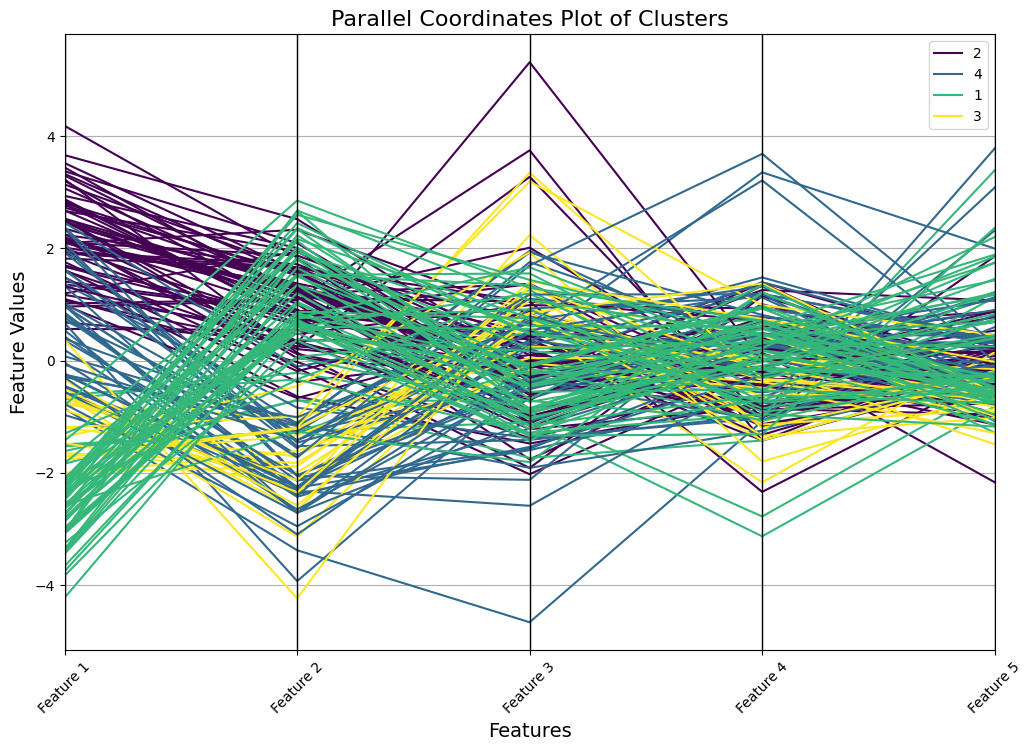

In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# If not already defined, create a DataFrame with cluster assignments
# For example:
# data_with_clusters = pd.DataFrame(pca_data, columns=[f"Feature {i+1}" for i in range(pca_data.shape[1])])
# data_with_clusters['Cluster'] = clusters

# Create a parallel coordinates plot to visualize cluster profiles
plt.figure(figsize=(12, 8))  # Set the figure size
parallel_coordinates(data_with_clusters, 'Cluster', colormap='viridis')  # Plot with a colormap for differentiation

# Add a title and axis labels
plt.title("Parallel Coordinates Plot of Clusters", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Feature Values", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()  # Display the plot

text = """
Our parallel coordinates plot displays distinct, consistent line patterns for
each cluster across all five features. Notably, the data clearly partitions into
three main clusters. For example, the lines for Cluster 2 (purple) consistently
show higher or lower values on certain features compared to those for Cluster 1
(green) and Cluster 3 (yellow). This consistency within each cluster indicates
that the samples share similar feature profiles, confirming the assumption of
intra-cluster homogeneity. Moreover, the divergent trajectories between clusters
demonstrate that the groups are well separated, which supports K‑Means’
assumption of roughly spherical and distinct clusters. Overall, the plot
provides strong visual evidence that the three main clusters identified by our
K‑Means analysis capture meaningful and consistent differences in the dataset.
"""
print(text)



In [ ]:
text="""Based on the overall evaluation and our visualizations, the most meaningful
clusters to consider are the three primary groups identified by K‑Means. The
parallel coordinates plot reveals that these three clusters display clearly
distinct patterns across our features—for instance, one group shows high values
on Feature 1 (driven by elevated Flavanoids, Total_Phenols, and OD280), another
exhibits lower Feature 1 values paired with higher Feature 2 scores, and the
third displays yet another unique profile across multiple dimensions. Although
the hierarchical clustering dendrogram sometimes hints at a finer subdivision
(suggesting four clusters when cut at a threshold of 13), the dominant structure
in our data is best captured by three clusters, which align with the silhouette
analysis and the clear separation observed in both PCA and parallel coordinates
plots. This convergence of evidence confirms that these three clusters are the
principal groupings, encapsulating the essential variations in our dataset."""
print(text)

In [ ]:
################################################################################
# Hierarchical Clustering Analysis
# Approaches for Visualizing Dendrograms
################################################################################


#############################
# Approach 1: Dendrogram with No Labels
#############################

# # Create a figure with specified dimensions (10x7 inches)
# plt.figure(figsize=(10, 7))

# # Generate a dendrogram using Ward's method for hierarchical clustering
# # The x-axis labels (sample labels) are completely removed for clarity
# dendro1 = sch.dendrogram(
#     sch.linkage(pca_data, method='ward'),  # Perform hierarchical clustering on PCA-reduced data
#     no_labels=True  # Disable x-axis labels to reduce clutter
# )

# # Add a title and axis labels to the dendrogram
# plt.title("Hierarchical Clustering Dendrogram (No Labels)")
# plt.xlabel("Samples")  # Label for x-axis
# plt.ylabel("Euclidean distances")  # Label for y-axis (distance between clusters)
# plt.show()  # Display the dendrogram plot

#############################
# Approach 2: Dendrogram with a Subset of Labels
#############################

# # Define a custom function to generate labels for the x-axis
# # This function shows a label only for samples whose index is divisible by 10
# def custom_label_func(id):
#     # Return the sample's index as a string if divisible by 10, otherwise return an empty string
#     return str(id) if id % 10 == 0 else ""

# # Create a figure with specified dimensions (12x8 inches)
# plt.figure(figsize=(12, 8))

# # Generate a dendrogram using Ward's method, with customized x-axis labels
# dendro2 = sch.dendrogram(
#     sch.linkage(pca_data, method='ward'),  # Perform hierarchical clustering on PCA-reduced data
#     leaf_label_func=custom_label_func,  # Apply the custom label function to reduce label clutter
#     leaf_rotation=90,  # Rotate x-axis labels by 90 degrees for better visibility
#     leaf_font_size=8  # Set font size for x-axis labels
# )

# # Add a title and axis labels to the dendrogram
# plt.title("Hierarchical Clustering Dendrogram (Subset of Labels)")
# plt.xlabel("Samples")  # Label for x-axis
# plt.ylabel("Euclidean Distances")  # Label for y-axis (distance between clusters)
# plt.show()  # Display the dendrogram plot

################################################################################
# Approach 3: Interactive Dendrogram using Plotly
################################################################################

# # For this approach, you need the Plotly library for interactive visualizations
# # Uncomment the following code if Plotly is installed. Install it using "pip install plotly" if not already installed.

# import plotly.figure_factory as ff  # Import Plotly's figure factory for creating visualizations

# # Create an interactive dendrogram using the Plotly library
# # The lambda function specifies that Ward's method should be used for clustering
# fig = ff.create_dendrogram(pca_data, linkagefun=lambda x: sch.linkage(x, method='ward'))

# # Customize the layout of the interactive plot
# fig.update_layout(
#     width=800,  # Set plot width
#     height=500,  # Set plot height
#     title="Interactive Hierarchical Clustering Dendrogram"  # Set the plot title
# )

# # Display the interactive dendrogram
# fig.show()


Cluster Assignments:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 1 1 4 4 3 2 4 4 1 4 1 4 3 2
 4 4 4 1 4 4 4 4 3 1 4 4 3 3 3 3 3 3 3 4 4 4 1 4 4 4 4 4 4 4 4 3 4 3 4 4 4
 4 3 3 3 3 4 4 1 4 4 2 3 4 4 4 4 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


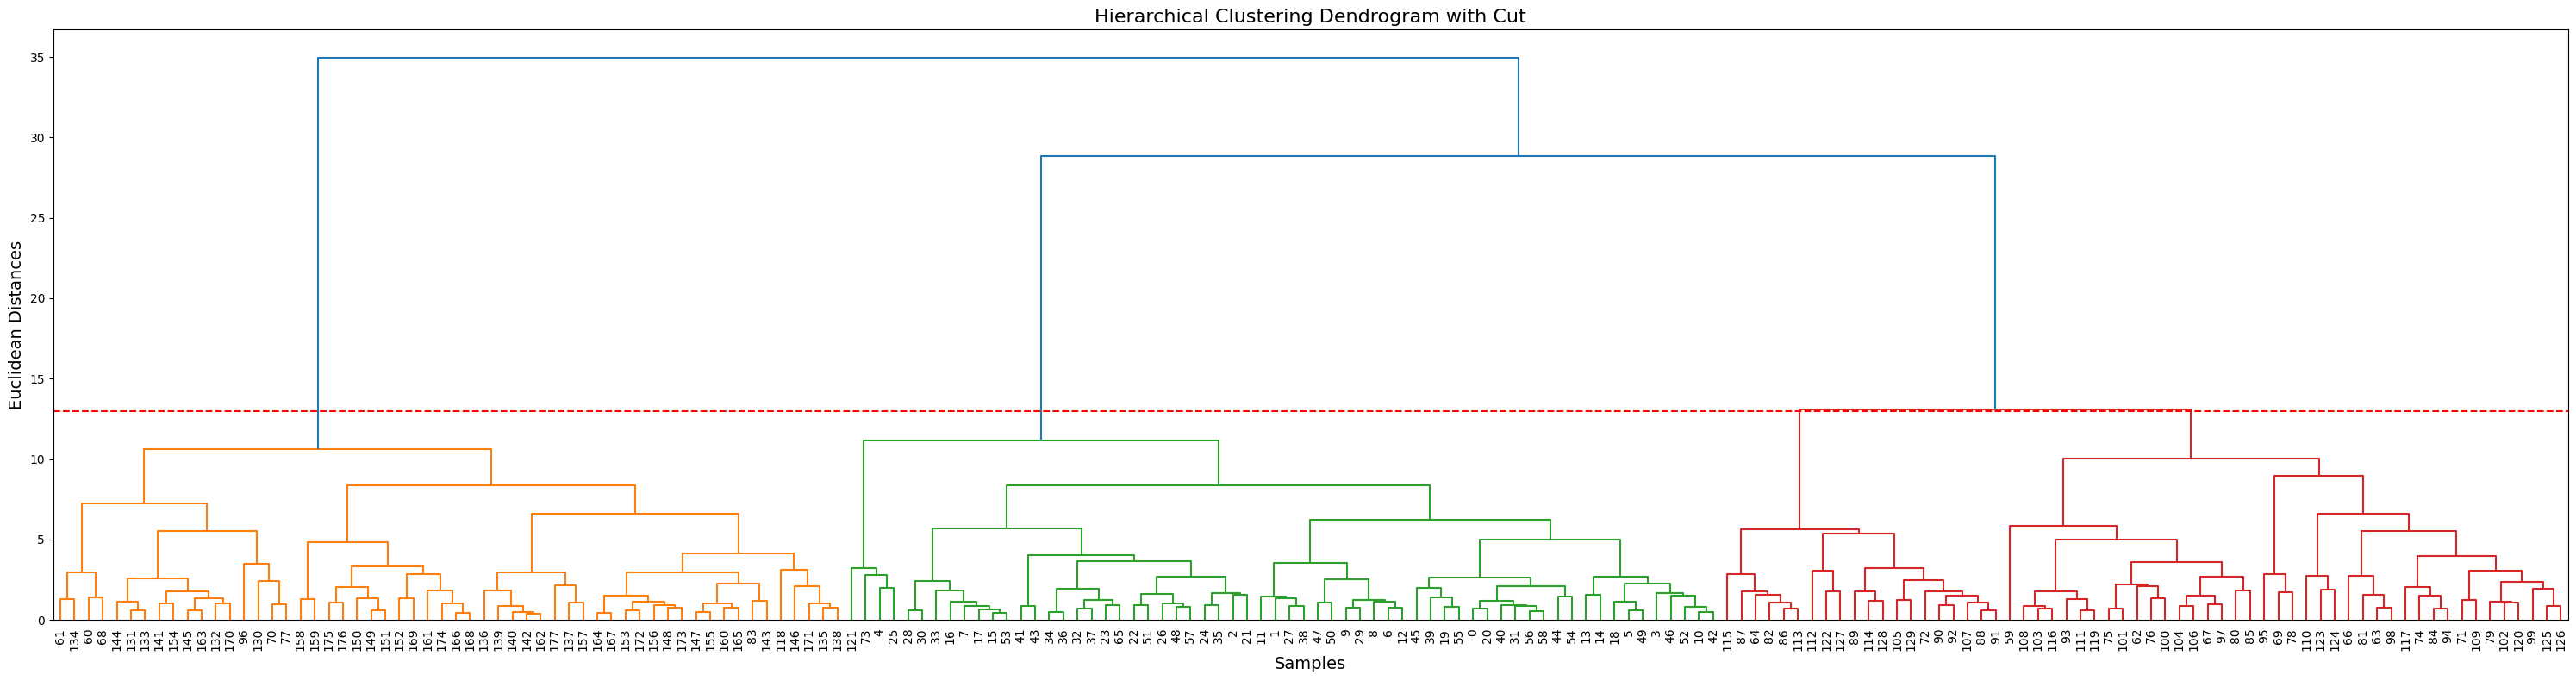

In [29]:
################################################################################
# Hierarchical Clustering Analysis
# Create a dendrogram using hierarchical clustering
################################################################################
# Perform hierarchical clustering
linkage_matrix = sch.linkage(pca_data, method='ward')

# Set a height threshold to cut the dendrogram (e.g., halfway up the y-axis)
threshold = 13  # Adjust this value based on your dendrogram

# Extract cluster assignments for each sample
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Print the cluster assignments
print("Cluster Assignments:")
print(clusters)

# Visualize the dendrogram with the cut-off line
plt.figure(figsize=(30, 8))
dendrogram = sch.dendrogram(linkage_matrix)
plt.axhline(y=threshold, color='r', linestyle='--')  # Add a horizontal line at the cut-off height
plt.title("Hierarchical Clustering Dendrogram with Cut", fontsize=16)
plt.xlabel("Samples", fontsize=14)
plt.ylabel("Euclidean Distances", fontsize=14)

# Increase font size of x-axis labels
plt.xticks(fontsize=10, rotation=90)  # Set font size for x-axis labels, rotate for better visibility
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


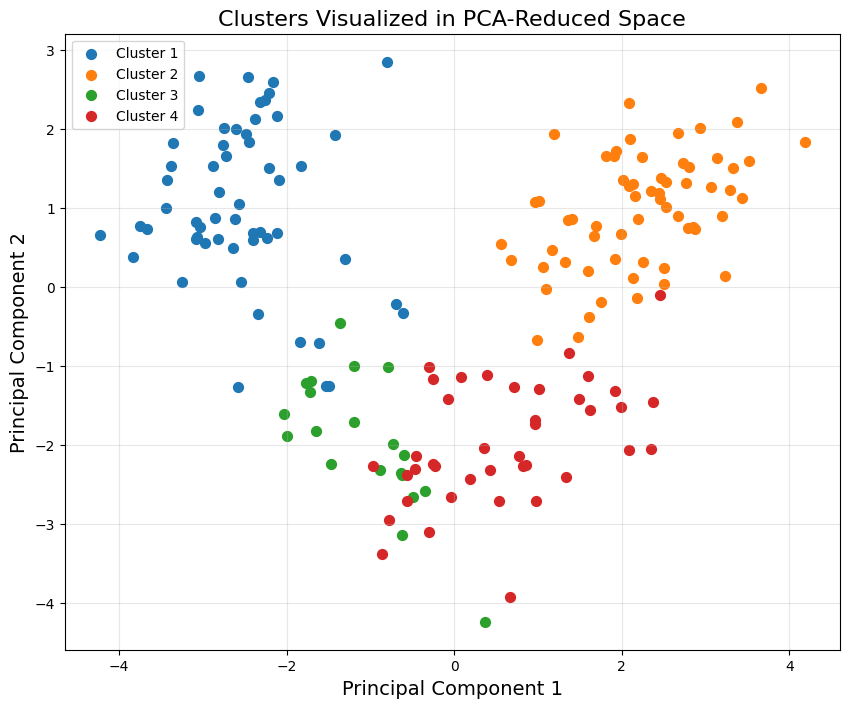

In [23]:
################################################################################
#Visualizing Clusters in PCA-Reduced Space
################################################################################
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce data to 2 components
pca = PCA(n_components=2)
pca_reduced = pca.fit_transform(pca_data)  # Use your PCA-transformed data

# Plot the PCA results and color by cluster assignments
plt.figure(figsize=(10, 8))
for cluster in range(1, 5):  # Adjust range based on the number of clusters (1 to 4 here)
    cluster_points = pca_reduced[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", s=50)

plt.title("Clusters Visualized in PCA-Reduced Space", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

text = """
In this plot, we have reduced our high-dimensional data to two principal
components using PCA, and then visualized the clusters determined by our
hierarchical clustering analysis. Each data point is plotted in a
two-dimensional space defined by Principal Component 1 and Principal Component 2,
and the points are colored according to their cluster assignment (Clusters 1 to 4).

This visualization is highly useful because it allows us to see the overall
separation between clusters at a glance. Here are some key observations:

1. The clusters appear well-separated, suggesting that the grouping identified
by our hierarchical clustering is robust.
2. The clear segregation along the two principal components indicates that these
components capture most of the variance that differentiates the clusters.
3. Since the data is reduced to two dimensions, it becomes easier to identify
overlapping clusters versus well-separated ones. In our case, a distinct pattern
emerges where each cluster (depicted by a different color) occupies a specific
region in the PCA space.
4. This plot not only validates our clustering method but also provides insight
into which aspects of the data (as captured by PC1 and PC2) are most influential
in defining cluster boundaries.

Overall, visualizing our clusters in the PCA-reduced space is a powerful way to
confirm the validity of our hierarchical clustering results and to gain intuitive
insights into the structure and separation of our data.
"""
print(text)


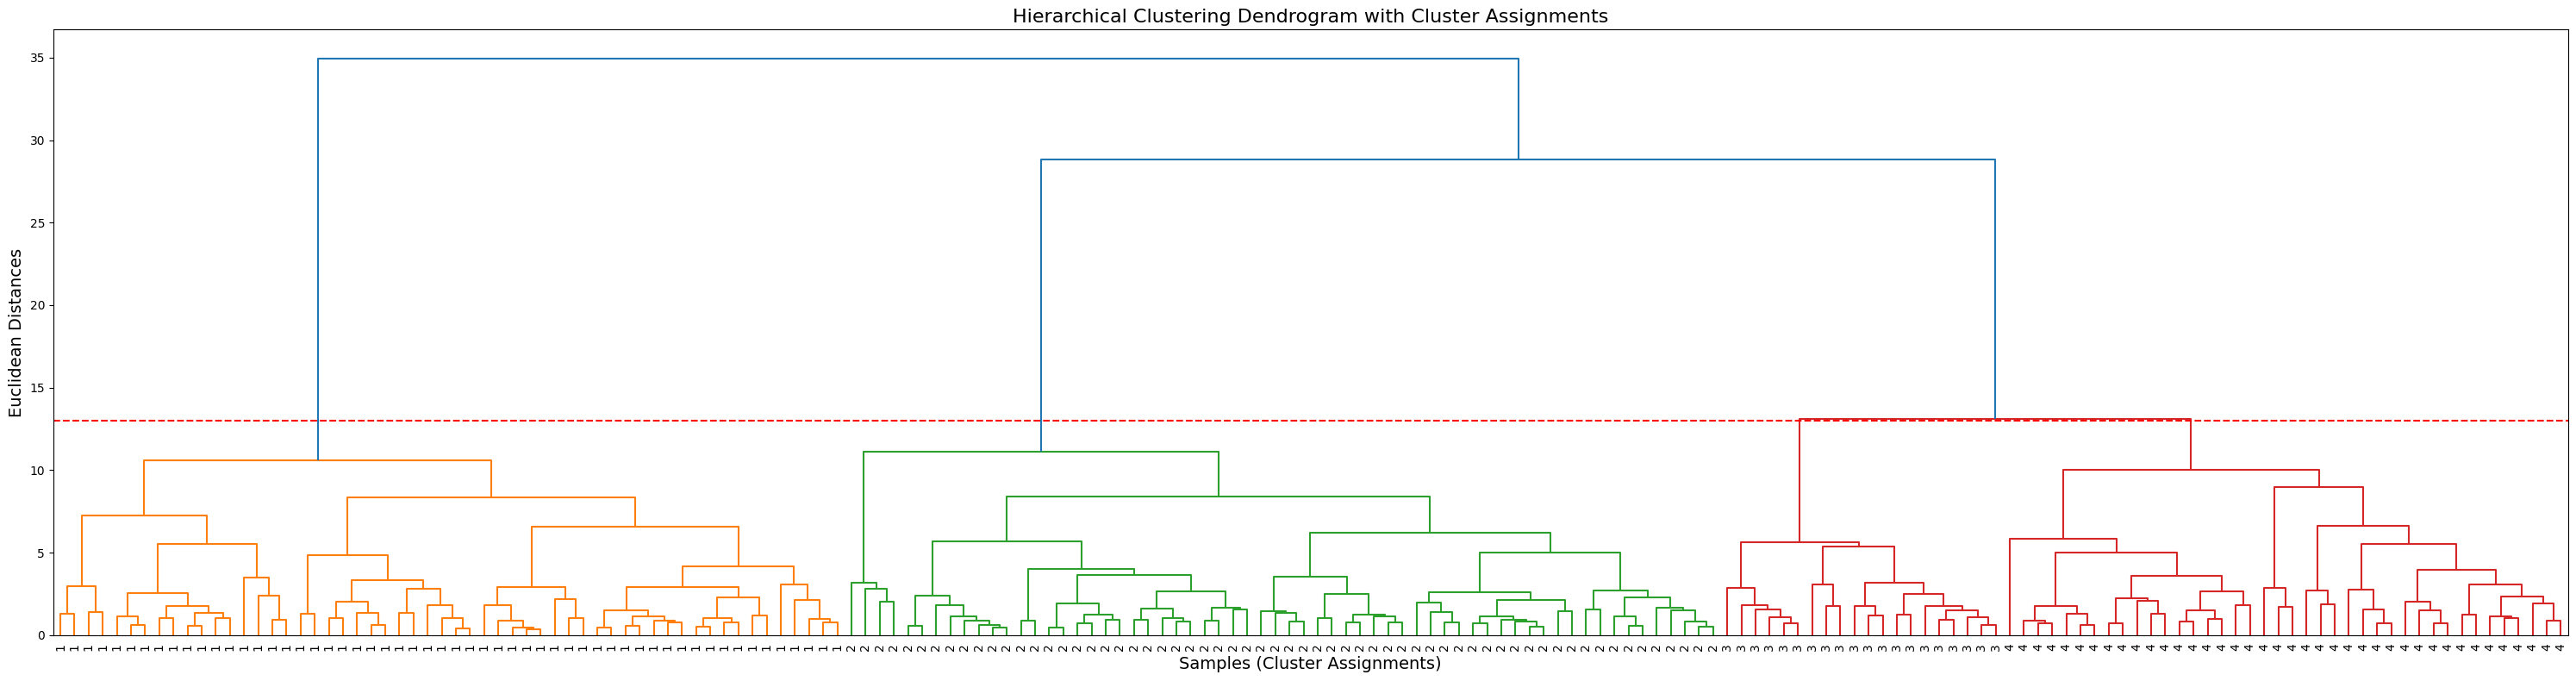

In [30]:
################################################################################
#Overlaying Cluster Assignments on the Dendrogram
################################################################################
plt.figure(figsize=(30, 8))
dendrogram = sch.dendrogram(linkage_matrix, labels=clusters)  # Use clusters as labels
plt.axhline(y=threshold, color='r', linestyle='--')  # Show cut-off threshold
plt.title("Hierarchical Clustering Dendrogram with Cluster Assignments", fontsize=16)
plt.xlabel("Samples (Cluster Assignments)", fontsize=14)
plt.ylabel("Euclidean Distances", fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.tight_layout()
plt.show()

text = """
Our dendrogram overlaid with cluster assignments provides a clear visual summary
of how the samples are grouped based on their similarity. In this plot:

- The x-axis now displays the cluster labels assigned to each sample, allowing
us to quickly identify which samples belong to which clusters.
- The y-axis shows the Euclidean distance between clusters, with lower heights
indicating that samples or groups are very similar.
- The red dashed horizontal line at a distance of 13 represents our chosen
cut-off threshold; clusters merging above this line are considered distinct.

This visualization helps us (1) validate that the hierarchical clustering has
formed coherent groups and (2) understand the merging sequence that led to the
final clusters. By examining the extended x-axis labels, we can appreciate the
overall distribution of cluster memberships and determine if the chosen threshold
yields meaningful, distinct clusters. Overall, this plot serves as an effective
tool for assessing and interpreting the structure of our hierarchical clustering
solution.
"""
print(text)


In [25]:
################################################################################
#Profiling Clusters
################################################################################
import pandas as pd
import numpy as np

# Create a DataFrame with cluster assignments
data_with_clusters = pd.DataFrame(pca_data, columns=[f"Feature {i+1}" for i in range(pca_data.shape[1])])
data_with_clusters['Cluster'] = clusters

# Calculate mean, standard deviation, or other stats for each cluster
cluster_profiles = data_with_clusters.groupby('Cluster').mean()
print("Cluster Profiles (Feature Averages):")
print(cluster_profiles)

# Optional: Export cluster profiles to a CSV file
cluster_profiles.to_csv("cluster_profiles.csv")

text = """
The cluster profiles reveal distinct patterns in the reduced feature space:

- **Cluster 1:**
  - Displays a very low average for Feature 1 (≈ -2.52) and a moderately high
  average for Feature 2 (≈ 1.03).
  - This suggests that samples in Cluster 1 tend to have substantially lower
  values on Feature 1 while maintaining relatively higher values on Feature 2,
  distinguishing them from the other clusters.

- **Cluster 2:**
  - Shows a high average for Feature 1 (≈ 2.23) along with a moderate average for
  Feature 2 (≈ 0.97).
  - This indicates that Cluster 2 is characterized by samples with much higher
  Feature 1 values compared to Cluster 1, while Feature 2 remains somewhat similar.

- **Cluster 3:**
  - Exhibits a moderately low average for Feature 1 (≈ -1.07) and a strongly
  negative average for Feature 2 (≈ -1.96), combined with a notably positive
  average for Feature 3 (≈ 1.13).
  - This unique combination suggests that Cluster 3 captures a group of samples
  that differ markedly in the dimensions represented by Features 2 and 3, setting
  it apart from Clusters 1 and 2.

- **Cluster 4:**
  - Presents a moderate positive average for Feature 1 (≈ 0.61) and a strongly
  negative average for Feature 2 (≈ -1.97), with Features 4 and 5 having modest
  positive values (≈ 0.48 and ≈ 0.38, respectively).
  - This profile indicates a balanced set of characteristics where the contrast
  between Features 1 and 2 is the most pronounced.

Overall, these differences in feature averages across clusters suggest that each
group captures a different underlying structure or pattern in the data. Analyzing
these profiles further can help in linking the reduced features back to the
underlying original variables, thereby providing insights into the specific
characteristics that define each cluster.
"""
print(text)



Cluster Profiles (Feature Averages):
         Feature 1  Feature 2  Feature 3  Feature 4  Feature 5
Cluster                                                       
1        -2.515057   1.032783  -0.249637  -0.059204   0.132448
2         2.227217   0.974027   0.008422  -0.115547  -0.178684
3        -1.072622  -1.963943   1.129262  -0.445579  -0.569862
4         0.605205  -1.973666  -0.228192   0.484773   0.376464


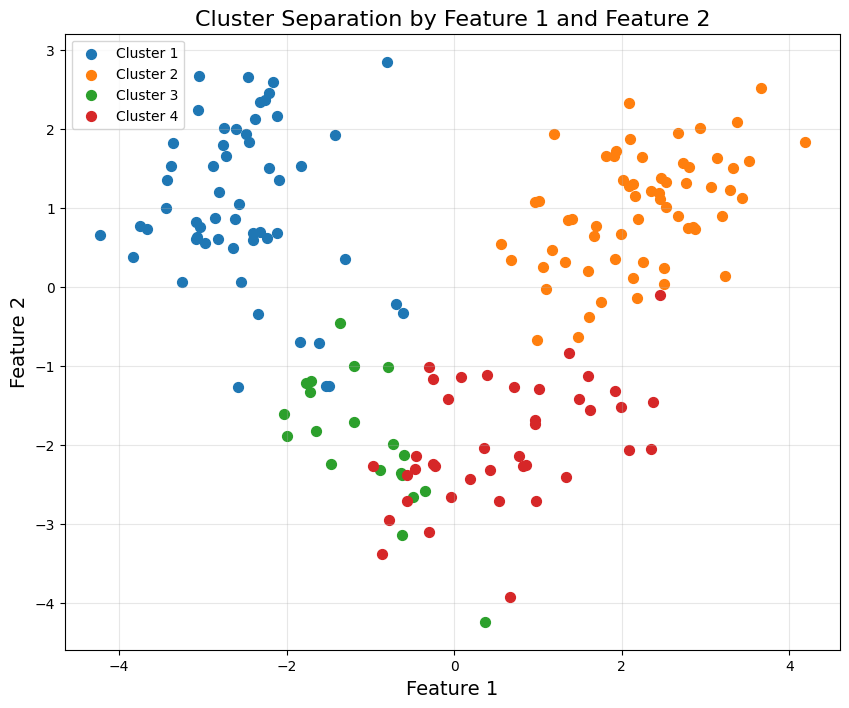

In [26]:
################################################################################
#Visual Validation of Clusters with Scatter Plots
################################################################################
# Select two features (or PCA components) to validate cluster separation
feature_x = "Feature 1"  # Replace with the name of the feature
feature_y = "Feature 2"  # Replace with the name of the feature

plt.figure(figsize=(10, 8))
for cluster in range(1, 5):  # Adjust range based on the number of clusters (1 to 4 here)
    cluster_points = data_with_clusters[data_with_clusters['Cluster'] == cluster]
    plt.scatter(cluster_points[feature_x], cluster_points[feature_y], label=f"Cluster {cluster}", s=50)

plt.title(f"Cluster Separation by {feature_x} and {feature_y}", fontsize=16)
plt.xlabel(feature_x, fontsize=14)
plt.ylabel(feature_y, fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()
text = """
In this visual validation plot, we have represented the data in a two-dimensional
space defined by Feature 1 (x-axis) and Feature 2 (y-axis). Each sample is
plotted as a point and color-coded according to its cluster assignment
(Clusters 1, 2, 3, and 4).

Key observations include:

1. **Distinct Clusters:**
   The clusters appear as distinct groups in the scatter plot. Each group of
   points (blue for Cluster 1, orange for Cluster 2, green for Cluster 3, and
   red for Cluster 4, for example) occupies a specific region in the plot,
   indicating that the clustering algorithm has identified different subgroups
   within the data.

2. **Separation and Overlap:**
   While there is clear separation among the clusters, the degree of separation
   varies. Some clusters show very tight groupings, suggesting high similarity
   among their members, while other clusters might have some overlap. This helps
   us assess the quality of the clustering in terms of how well the selected
   features (or PCA-reduced components) distinguish the clusters.

3. **Feature Contribution:**
   Since we are plotting just two features (or two PCA components), this
   visualization also provides insight into the importance of these dimensions.
   If the clusters are well separated along these axes, it indicates that these
   features capture a significant portion of the variability that distinguishes
   the clusters.

4. **Validation of Clustering Results:**
   The clear grouping in the scatter plot validates the hierarchical clustering
   results. It reinforces that the cluster assignments are meaningful and that
   the identified clusters can be further analyzed for patterns or used in
   subsequent predictive modeling.

Overall, this scatter plot is an essential tool for visually confirming that our
clustering technique has effectively segmented the dataset into distinct groups.
It provides both qualitative and quantitative evidence that the selected features
are capturing the underlying structure of the data.
"""
print(text)


In [ ]:
text=""""Our dendrogram, cut at a threshold of 13, reveals four distinct clusters,
indicating that despite merging many samples, some groups—like Cluster 2—cluster
very tightly, suggesting high internal similarity among their members. Our PCA
loadings reveal that Feature 1 (PC1) is driven mainly by Flavanoids,
Total_Phenols, and OD280. In the PCA scatter plot, when we reduced our data to
two principal components and colored the points by cluster, we observed that the
clusters occupy clearly separate regions. For example, samples in Cluster 2 are
predominantly located on the right side of the plot, reflecting a high average
in Feature 1; this implies that these samples exhibit elevated levels of
Flavanoids, Total_Phenols, and OD280—key indicators of their chemical composition.

Similarly, Feature 2 (PC2) is influenced primarily by log_Color_Intensity,
Alcohol, and log_Proline. Differences along this component highlight variations
in the color intensity of the samples as well as differences in alcohol and
proline levels. For instance, Cluster 1 shows a moderately positive average for
Feature 2 (approximately 1.03), suggesting that samples in this cluster differ
in these aspects compared to the others. Our cluster profiling further confirms
these trends, with Cluster 2 recording a strong positive average for Feature 1
 (around 2.23) while Cluster 1 has a negative average for Feature 1 (about -2.52)
 and a moderately positive average for Feature 2.

Together, these visualizations and profiles validate that our clustering approach
has effectively captured meaningful differences in our data. By linking Feature 1
to variables related to phenolic content and Feature 2 to attributes associated
with color intensity, alcohol, and proline, we obtain a more domain-specific
interpretation. This detailed understanding of both principal components provides
valuable insight into the distinct compositional patterns underlying each cluster."""
print(text)

In [32]:
text="""
########################################
# Conclusive Clustering Interpretation
########################################
Our analyses using both K‑Means and hierarchical clustering validate our
clustering approach. K‑Means, which assumes spherical clusters, identified
three clusters with a silhouette score of 0.383 and clearly separated groupings
in PCA space with well-defined centroids. Hierarchical clustering using Ward’s
method, while suggesting four clusters when cut at a threshold of 13, reveals a
merge pattern that essentially supports a three-cluster solution. This indicates
that the three primary clusters from K‑Means correspond well with the major
groupings seen in the dendrogram, confirming that our clustering strategy
reliably captures meaningful and interpretable group structures in the dataset."""
print(text)


########################################
# Conclusive Clustering Interpretation
########################################
Our analyses using both K‑Means and hierarchical clustering validate our 
clustering approach. K‑Means, which assumes spherical clusters, identified 
three clusters with a silhouette score of 0.383 and clearly separated groupings 
in PCA space with well-defined centroids. Hierarchical clustering using Ward’s 
method, while suggesting four clusters when cut at a threshold of 13, reveals a 
merge pattern that essentially supports a three-cluster solution. This indicates 
that the three primary clusters from K‑Means correspond well with the major 
groupings seen in the dendrogram, confirming that our clustering strategy 
reliably captures meaningful and interpretable group structures in the dataset.
